In [ ]:
pip install pandas numpy seaborn matplotlib sklearn geopandas yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, k_means
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
### Import data from csv file
data = pd.read_csv (r'/content/data.csv', sep=';', encoding='cp1252')   
print(data.shape)
data.head()

(542, 11)


,daerah,lahan_2020,realisasi_belanja2020,kfd_category,kfd,anggaran_belanja2021,realiasasi_dak2021,penyerapan_hibah_2019,penyerapan_hibah_2020,alokasi_hibah_2021,A2021_MIN_A2020
0,Kab. Aceh Barat,NaN,83464189690,1,0.465,21727384137,1087750000,0.00,0.0,0,0.00
1,Kab. Aceh Barat Daya,NaN,204000000000,1,0.448,57212407276,291125000,0.00,0.0,0,0.00
2,Kab. Aceh Besar,NaN,200000000000,3,0.986,63579945009,1767480500,97.01,97.0,8244352000,-6.02
3,Kab. Aceh Jaya,NaN,142000000000,1,0.416,42338089049,928625000,0.00,0.0,0,0.00
4,Kab. Aceh Selatan,NaN,169000000000,2,0.726,32828589305,337250000,0.00,0.0,0,0.00


Data Preprocessing : EDA & Data Cleaning

In [ ]:
# Getting rid of non numerical data
features = list(data.columns)[4:7]
num_data = data[features]
print(num_data.tail())
print(num_data.shape)

       kfd  anggaran_belanja2021  realiasasi_dak2021
537  0.704            9933427304           245000000
538  0.473            9770757273           245000000
539  0.397            5753327935           245000000
540  0.588           14210999421           245000000
541  0.294                     0                   0
(542, 3)


In [ ]:
# Checking for null values
data.isnull().sum()

daerah                     0
lahan_2020               214
realisasi_belanja2020      0
kfd_category               0
kfd                        0
anggaran_belanja2021       0
realiasasi_dak2021         0
penyerapan_hibah_2019      0
penyerapan_hibah_2020      0
alokasi_hibah_2021         0
A2021_MIN_A2020            0
dtype: int64

In [ ]:
#Standardize data
ss = StandardScaler()
n_data = ss.fit_transform(num_data)
dataframe = pd.DataFrame(n_data, columns = num_data.columns)
print(dataframe.head())

        kfd  anggaran_belanja2021  realiasasi_dak2021
0 -0.342666             -0.095983            0.586905
1 -0.412127              0.996061           -0.470148
2  1.786093              1.192020            1.488849
3 -0.542876              0.538307            0.375760
4  0.723757              0.245654           -0.408944


Checking for multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set 
#, 'penyerapan_hibah_2019', 'penyerapan_hibah_2020', 'alokasi_hibah_2021', 'A2021_MIN_A2020'
X = dataframe[['kfd', 'anggaran_belanja2021', 'realiasasi_dak2021']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataframe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0                   kfd  1.000193
1  anggaran_belanja2021  1.002214
2    realiasasi_dak2021  1.002058


K-Means Clustering

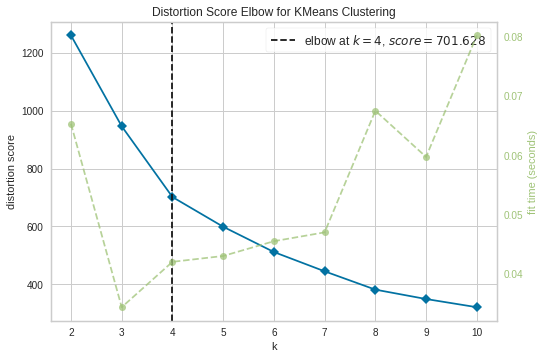

In [ ]:
# Using elbow method to find out the best number of clusters
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X)    
elb_visualizer.show()

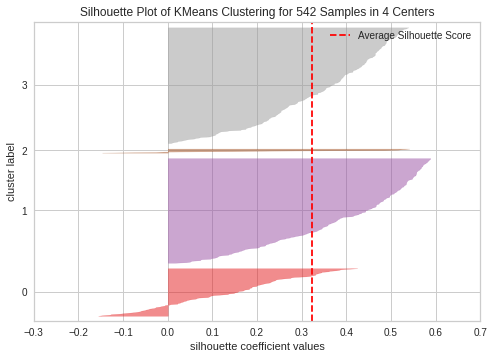

In [ ]:
# Using sillhouette method to find out the best number of clusters
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

In [ ]:
# Running K-means Clustering into dataset
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=42)
data['clusters'] = kmeans.fit_predict(dataframe)

y = data['clusters']
print(data)

                      daerah lahan_2020  realisasi_belanja2020  kfd_category  \
0            Kab. Aceh Barat        NaN            83464189690             1   
1       Kab. Aceh Barat Daya        NaN           204000000000             1   
2            Kab. Aceh Besar        NaN           200000000000             3   
3             Kab. Aceh Jaya        NaN           142000000000             1   
4          Kab. Aceh Selatan        NaN           169000000000             2   
..                       ...        ...                    ...           ...   
537    Kota Pematang Siantar       2092             1113306445             2   
538             Kota Sibolga          –            35722793609             1   
539       Kota Tanjung Balai         74            27350207573             1   
540       Kota Tebing Tinggi        485            58221885935             2   
541  Provinsi Sumatera Utara        NaN                      0             2   

       kfd  anggaran_belanja2021  reali

In [ ]:
data.to_excel('cluster_data.xlsx', sheet_name='sheet1', index=True)

Run PCA on the data and reduce the dimensions in pca_num_components dimensions

In [ ]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(dataframe)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions using PCA')
plt.show()

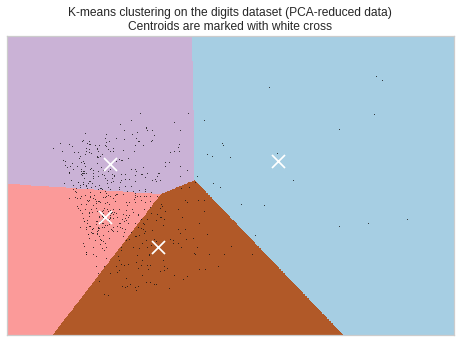

In [ ]:
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary and assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Correlation Heatmap

In [ ]:
data2 = data[data['alokasi_hibah_2021']!= 0]
print(data2)

                      daerah lahan_2020  realisasi_belanja2020  kfd_category  \
2            Kab. Aceh Besar        NaN           200000000000             3   
9            Kab. Aceh Timur        NaN                      0             3   
10           Kab. Aceh Utara        NaN           113000000000             3   
12              Kab. Bireuen        NaN           170000000000             3   
23             Provinsi Aceh        NaN          1220000000000             2   
..                       ...        ...                    ...           ...   
508              Kab. Asahan      10701           125000000000             3   
512  Kab. Humbang Hasundutan      12772            80301414629             1   
528          Kab. Simalungun      34685            97965755668             4   
530     Kab. Tapanuli Tengah      12083            61825325976             2   
541  Provinsi Sumatera Utara        NaN                      0             2   

       kfd  anggaran_belanja2021  reali

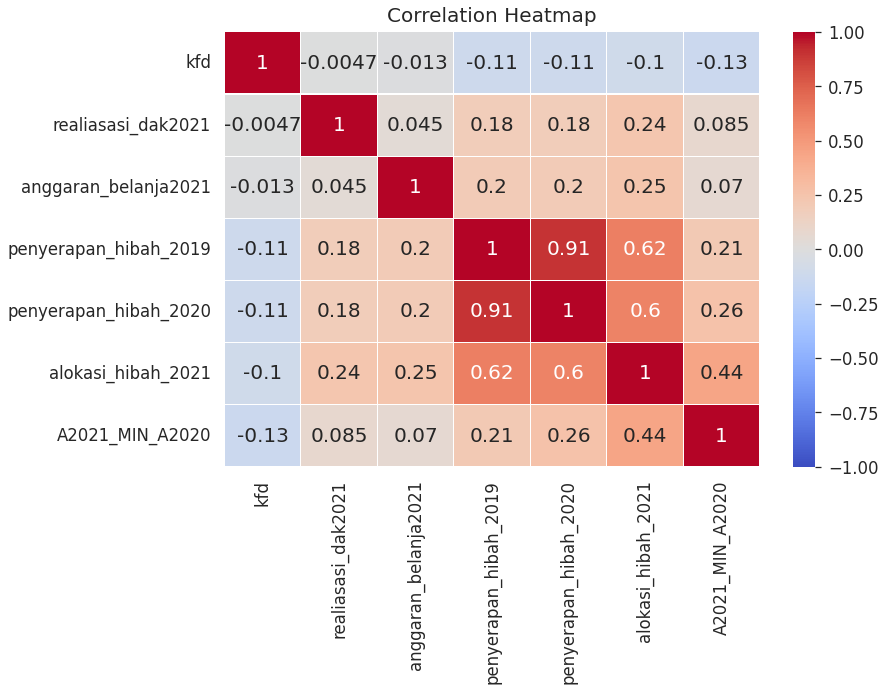

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(12, 8))

# Store heatmap object in a variable
# Set the range of values to be displayed on the colormap from -1 to 1, 
# and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data[['kfd', 'realiasasi_dak2021', 'anggaran_belanja2021', 'penyerapan_hibah_2019', 'penyerapan_hibah_2020', 'alokasi_hibah_2021', 'A2021_MIN_A2020']].corr(), 
                      vmin=-1, vmax=1, annot=True, cmap="coolwarm", 
        linewidths=0.1, annot_kws={"size":20})  
sns.set(font_scale=1.5)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=10);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



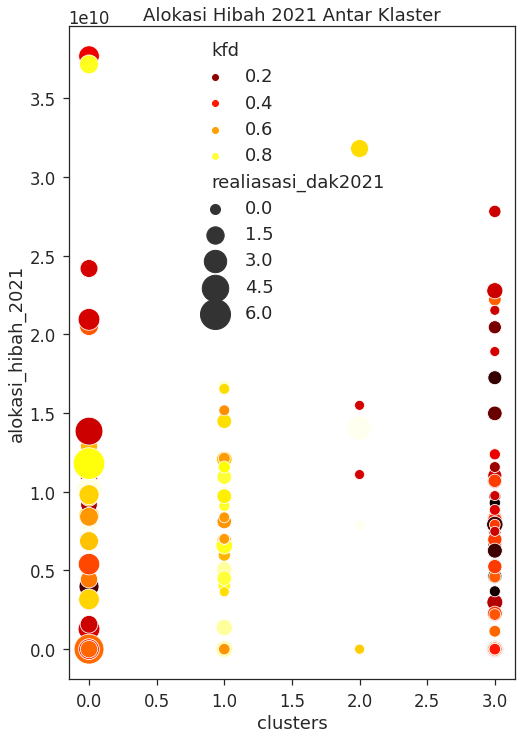

In [ ]:
plt.figure(figsize=(8,12))
sns.set_style("ticks")
sns.scatterplot(data['clusters'], data['alokasi_hibah_2021'], size=data['realiasasi_dak2021'], 
                hue=data['kfd'], palette='hot', sizes=(100,1000))
plt.title('Alokasi Hibah 2021 Antar Klaster')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


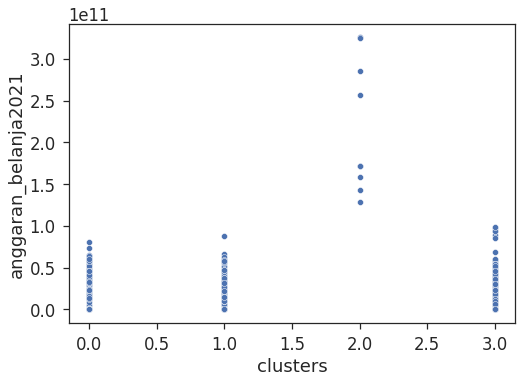

In [ ]:
sns.scatterplot(data['clusters'], data['anggaran_belanja2021'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


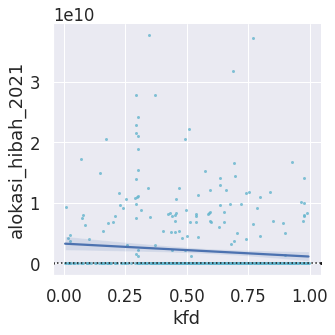

In [ ]:
g = sns.lmplot('kfd', 'alokasi_hibah_2021', data=data,
               markers=".", scatter_kws=dict(color='c')) 
g.map(plt.axhline, y=0.1, color="k", ls=":");

In [ ]:
#Parallel Coordinates Plot to Visualize Clustering Result
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Parcoords(line = dict(color = data['clusters'], colorscale=["red", "orange", "blue", "yellow"]),
        dimensions = list([
            dict(range = [0,1],
                 constraintrange = [0,100],
                label = 'KFD',  values = data['kfd']),
            dict(range = [0,325500393894], label = 'A_BD2021', values = data['anggaran_belanja2021']),
            dict(range = [0,6735289250], label = 'R_DAK2021', values = data['realiasasi_dak2021']),
            #dict(range = [0,100], label = 'R_Hibah2019', values = data['penyerapan_hibah_2019']),
            #dict(range = [0,100], label = 'R_Hibah2020', values = data['penyerapan_hibah_2020']),
            dict(range = [0,37688754000], label = 'A_Hibah2021', values = data['alokasi_hibah_2021'])
            #dict(range = [-100,2495], label = 'A2021-A2020', values = data['A2021_MIN_A2020'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    font_size=20
)

fig.show()

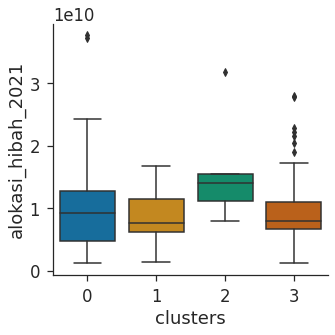

In [ ]:
sns.catplot(kind='box', data=data2, 
            y='alokasi_hibah_2021', x='clusters', palette="colorblind", sharey=True)
plt.show()